In [1]:
#Modules for Data Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#Machine Learning Models
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv(r"C:\Users\91807\Downloads\train.csv",index_col ='PassengerId')
test_data = pd.read_csv(r"C:\Users\91807\Downloads\test.csv",index_col ='PassengerId')

In [3]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
# Checking Corrlation values for Pclass and Survived
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
# Checking Corrlation values for Sex and Survived
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Survived', ylabel='Age'>

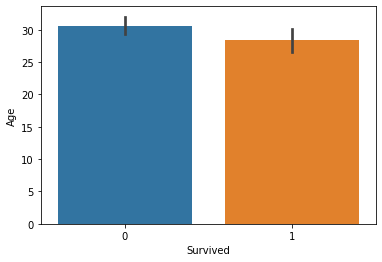

In [8]:
sb.barplot(data = train_data, x="Survived", y="Age")

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

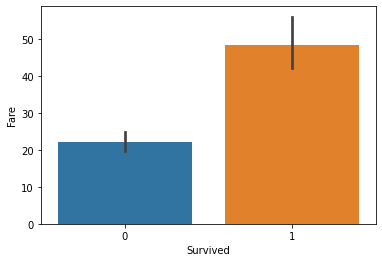

In [9]:
sb.barplot(data = train_data, x="Survived", y="Fare")

In [10]:
#Title Extarction
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [11]:
# Combining titles to club them into small categories
combine_data = [train_data,test_data]
for value in combine_data:
    value['Title'] = value['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Leftover')

    value['Title'] = value['Title'].replace('Mlle', 'Miss')
    value['Title'] = value['Title'].replace('Ms', 'Miss')
    value['Title'] = value['Title'].replace('Mme', 'Mrs')
    
train_data[['Title','Survived']].groupby(['Title'], as_index=False).count()

,Title,Survived
0,Leftover,23
1,Master,40
2,Miss,185
3,Mr,517
4,Mrs,126


In [12]:
#Drop the Name,Ticket and Cabin variable
train_data = train_data.drop(["Name","Ticket","Cabin"], axis=1)
test_data = test_data.drop(["Name","Ticket","Cabin"], axis=1)

In [13]:
train_data['Family'] = np.where(train_data['SibSp'] + train_data['Parch'] > 0, 1, 0)
test_data['Family'] = np.where(test_data['SibSp'] + test_data['Parch'] > 0, 1, 0)
train_data.drop(['SibSp', 'Parch'], axis= 1, inplace= True)
test_data.drop(['SibSp', 'Parch'], axis= 1, inplace= True)

In [14]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
PassengerId,,,,,,,,
1,0,3,male,22.0,7.2500,S,Mr,1
2,1,1,female,38.0,71.2833,C,Mrs,1
3,1,3,female,26.0,7.9250,S,Miss,0
4,1,1,female,35.0,53.1000,S,Mrs,1
5,0,3,male,35.0,8.0500,S,Mr,0


In [15]:
#Imputation of Variable Age
train_data['Age'] = train_data.Age.fillna(train_data.Age.mean())
test_data['Age'] = test_data.Age.fillna(test_data.Age.mean())

In [16]:
#Imputation of Variable Fare
test_data['Fare'].fillna(test_data['Fare'].median(), inplace= True)

In [17]:
#finding the port with highest frequency
frequent_port = train_data.Embarked.dropna().mode()[0]
frequent_port

'S'

In [18]:
#computing embarked variable
train_data['Embarked'].fillna('S', inplace= True)
test_data['Embarked'].fillna('S', inplace= True)

In [19]:
labencod = LabelEncoder()
train_data.Sex = labencod.fit_transform(train_data['Sex'])
train_data.Embarked = labencod.fit_transform(train_data['Embarked'])
train_data.Title = labencod.fit_transform(train_data['Title'])

In [20]:
test_data.Sex = labencod.fit_transform(test_data['Sex'])
test_data.Embarked = labencod.fit_transform(test_data['Embarked'])
test_data.Title = labencod.fit_transform(test_data['Title'])

In [21]:
stsc = StandardScaler()
train_data[['Age', 'Fare']] = stsc.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = stsc.fit_transform(test_data[['Age', 'Fare']])

In [22]:
print(test_data.head())
print('#'*75)
print(train_data.head())
print('#'*75)

             Pclass  Sex       Age      Fare  Embarked  Title  Family
PassengerId                                                          
892               3    1  0.334993 -0.497413         1      3       0
893               3    0  1.325530 -0.512278         2      4       1
894               2    1  2.514175 -0.464100         1      3       0
895               3    1 -0.259330 -0.482475         2      3       0
896               3    0 -0.655545 -0.417492         2      4       1
###########################################################################
             Survived  Pclass  Sex       Age      Fare  Embarked  Title  \
PassengerId                                                               
1                   0       3    1 -0.592481 -0.502445         2      3   
2                   1       1    0  0.638789  0.786845         0      4   
3                   1       3    0 -0.284663 -0.488854         2      2   
4                   1       1    0  0.407926  0.420730     

In [23]:
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

In [25]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
acc_decision_tree = round(decision_tree.score(X,y) * 100, 2)
acc_decision_tree

98.43

[Text(0.4565677966101695, 0.9285714285714286, 'Pclass <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.2330508474576271, 0.7857142857142857, 'Survived <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.07627118644067797, 0.6428571428571429, 'Sex <= -2.093\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.03389830508474576, 0.5, 'Survived <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.01694915254237288, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05084745762711865, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11864406779661017, 0.5, 'Age <= -0.067\ngini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(0.0847457627118644, 0.35714285714285715, 'Age <= -0.08\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(0.06779661016949153, 0.21428571428571427, 'Sex <= 2.024\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(0.05084745762711865, 0.07142857142857142, '\n  (...)  \n'),
 Tex

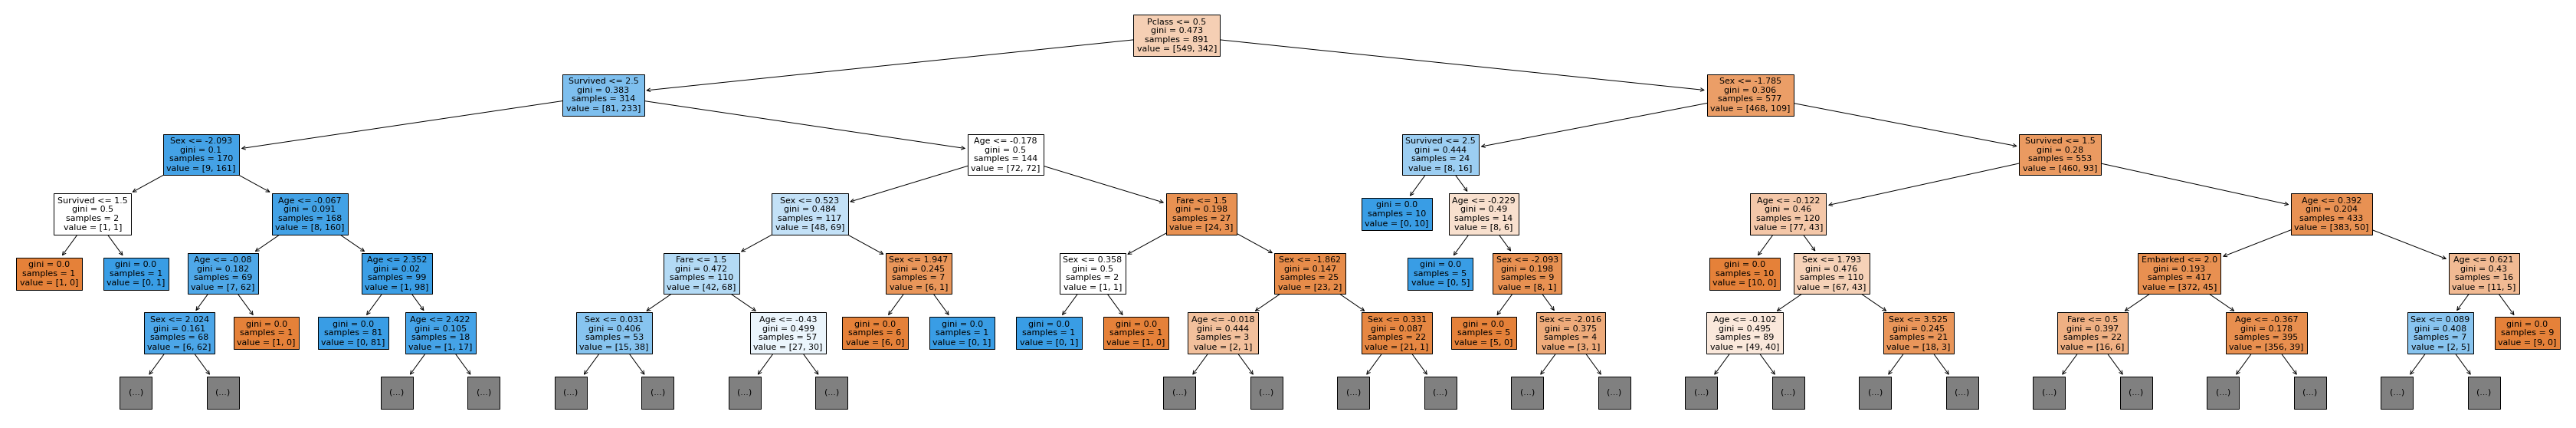

In [38]:
from sklearn import tree
from sklearn.tree import plot_tree, export_text

plt.figure(figsize = (60,10))
plot_tree(decision_tree.fit(X,y), feature_names = train_data.columns, max_depth = 5, filled = True)

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_tree, X,y, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
print("Average Classification Accuracy:", round(scores.mean(),4)*100)

Scores: [0.72625698 0.76966292 0.79213483 0.75842697 0.79213483]
Mean: 0.7677233067604042
Standard Deviation: 0.024500959628209244
Average Classification Accuracy: 76.77000000000001


In [41]:
# Grid Creation
ranf_grid = {'n_estimators': [100,150,200,250,300,350,400],
               'max_depth': [1,2,3,4,5,6,7,8],
}

In [33]:
ranf_base = RandomForestClassifier()
ranf_random = GridSearchCV(estimator = ranf_base, param_grid= ranf_grid, cv = 5)

In [34]:
ranf_random.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400]})

In [35]:
ranf_random.best_score_

0.8294206264515724

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ranf_base, X,y, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
print("Average Classification Accuracy:", round(scores.mean(),4)*100)

Scores: [0.79888268 0.79213483 0.85393258 0.7752809  0.79775281]
Mean: 0.8035967610319503
Standard Deviation: 0.026545181486808133
Average Classification Accuracy: 80.36


In [36]:
Survived = ranf_random.predict(test_data)
Survived

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,